In [1]:
import findspark
import pandas
import matplotlib.pyplot as plt
import numpy
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
data = spark.read.csv('./Measurement_summary.csv', header=True, inferSchema=True)
data.show()
file.columns
file.printSchema()
file.count()

+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+-----+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM2.5|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+-----+
|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|  73|   57|
|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|  71|   59|
|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|   59|
|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|   58|
|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|  69|   61|
|   2017/1/1 5:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.046|0.002|1.1|  70|   61|
|   2017/1/1 6:00| 

NameError: name 'file' is not defined

In [3]:
data = pandas.read_csv("./Measurement_summary.csv")

In [4]:
print(data.columns)
print(data.shape)
print(data.dtypes)

Index(['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude',
       'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')
(647511, 11)
Measurement date     object
Station code          int64
Address              object
Latitude            float64
Longitude           float64
SO2                 float64
NO2                 float64
O3                  float64
CO                  float64
PM10                  int64
PM2.5                 int64
dtype: object


(array([77714., 51786., 77690., 51810., 51797., 77701., 51798., 77692.,
        51810., 77713.]),
 array([101. , 103.4, 105.8, 108.2, 110.6, 113. , 115.4, 117.8, 120.2,
        122.6, 125. ]),
 <a list of 10 Patch objects>)

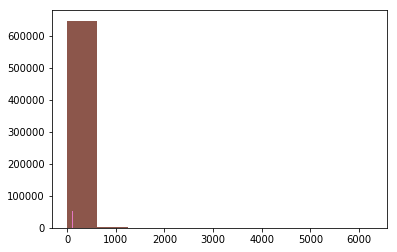

In [5]:
plt.hist(data["SO2"])
plt.hist(data["NO2"])
plt.hist(data["O3"])
plt.hist(data["CO"])
plt.hist(data["PM10"])
plt.hist(data["PM2.5"])
plt.hist(data["Station code"])

In [6]:
print(data.isnull().any())

Measurement date    False
Station code        False
Address             False
Latitude            False
Longitude           False
SO2                 False
NO2                 False
O3                  False
CO                  False
PM10                False
PM2.5               False
dtype: bool


In [7]:
print((data == 0).astype(float).sum(axis=0))

Measurement date       0.0
Station code           0.0
Address                0.0
Latitude               0.0
Longitude              0.0
SO2                 4346.0
NO2                 4794.0
O3                  4999.0
CO                  4485.0
PM10                6055.0
PM2.5               6123.0
dtype: float64


In [8]:
print(data[data["SO2"]<=0].iloc[0])

Measurement date                                       2017/2/5 14:00
Station code                                                      101
Address             19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...
Latitude                                                       37.572
Longitude                                                     127.005
SO2                                                                -1
NO2                                                                -1
O3                                                                 -1
CO                                                                 -1
PM10                                                               -1
PM2.5                                                              -1
Name: 854, dtype: object


In [9]:
data_sel = data[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5"]]
print(data_sel)

        Measurement date  Station code    SO2    NO2     O3   CO  PM10  PM2.5
0          2017/1/1 0:00           101  0.004  0.059  0.002  1.2    73     57
1          2017/1/1 1:00           101  0.004  0.058  0.002  1.2    71     59
2          2017/1/1 2:00           101  0.004  0.056  0.002  1.2    70     59
3          2017/1/1 3:00           101  0.004  0.056  0.002  1.2    70     58
4          2017/1/1 4:00           101  0.003  0.051  0.002  1.2    69     61
5          2017/1/1 5:00           101  0.003  0.046  0.002  1.1    70     61
6          2017/1/1 6:00           101  0.003  0.049  0.002  1.1    66     57
7          2017/1/1 7:00           101  0.003  0.045  0.002  1.0    71     60
8          2017/1/1 8:00           101  0.004  0.047  0.002  1.1    72     60
9          2017/1/1 9:00           101  0.003  0.047  0.002  1.1    74     63
10        2017/1/1 10:00           101  0.004  0.045  0.004  1.0    76     68
11        2017/1/1 11:00           101  0.004  0.048  0.005  1.0

In [10]:
data_sel = data[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5"]]
print(data_sel.shape)

deta_sel = data_sel.dropna(axis=0, how='any', inplace=True)
print(data_sel.shape)

(647511, 8)
(647511, 8)


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
data_cle = data_sel.drop(data_sel[data_sel["SO2"]<=0].index)
data_cle = data_cle.drop(data_cle[data_cle["NO2"]<=0].index)
data_cle = data_cle.drop(data_cle[data_cle["O3"]<=0].index)
data_cle = data_cle.drop(data_cle[data_cle["CO"]<=0].index)
data_cle = data_cle.drop(data_cle[data_cle["PM10"]<=0].index)
data_cle = data_cle.drop(data_cle[data_cle["PM2.5"]<=0].index)

print(data_cle.shape)

(632447, 8)


In [12]:
#print(data_cle[data_cle["SO2"]<=0].iloc[0])
print(data_cle[data_cle["SO2"]>0].iloc[0])

Measurement date    2017/1/1 0:00
Station code                  101
SO2                         0.004
NO2                         0.059
O3                          0.002
CO                            1.2
PM10                           73
PM2.5                          57
Name: 0, dtype: object


In [14]:
data_cle["SO2_level"] = data_cle["SO2"]>=0.15
data_cle["NO2_level"] = data_cle["NO2"]>=0.2
data_cle["O3_level"] = data_cle["O3"]>=0.15
data_cle["CO_level"] = data_cle["CO"]>=15
data_cle["PM10_level"] = data_cle["PM10"]>=150
data_cle["PM2.5_level"] = data_cle["PM2.5"]>=75
print(data_cle.columns)
print(data_cle)

Index(['Measurement date', 'Station code', 'SO2', 'NO2', 'O3', 'CO', 'PM10',
       'PM2.5', 'SO2_level', 'NO2_level', 'O3_level', 'CO_level', 'PM10_level',
       'PM2.5_level'],
      dtype='object')
        Measurement date  Station code    SO2    NO2     O3   CO  PM10  PM2.5  \
0          2017/1/1 0:00           101  0.004  0.059  0.002  1.2    73     57   
1          2017/1/1 1:00           101  0.004  0.058  0.002  1.2    71     59   
2          2017/1/1 2:00           101  0.004  0.056  0.002  1.2    70     59   
3          2017/1/1 3:00           101  0.004  0.056  0.002  1.2    70     58   
4          2017/1/1 4:00           101  0.003  0.051  0.002  1.2    69     61   
5          2017/1/1 5:00           101  0.003  0.046  0.002  1.1    70     61   
6          2017/1/1 6:00           101  0.003  0.049  0.002  1.1    66     57   
7          2017/1/1 7:00           101  0.003  0.045  0.002  1.0    71     60   
8          2017/1/1 8:00           101  0.004  0.047  0.002  1.1    7

In [15]:
data_cle.sort_values(by=["Station code","Measurement date"],inplace=True,ascending=[True,False])
print(data_cle)
data_cle.sort_values(by=["Station code","Measurement date"],inplace=True,ascending=[True,True])
print(data_cle)

       Measurement date  Station code    SO2    NO2     O3   CO  PM10  PM2.5  \
23202     2019/9/9 9:00           101  0.003  0.036  0.008  0.8    48     33   
23201     2019/9/9 8:00           101  0.004  0.035  0.006  0.9    50     34   
23200     2019/9/9 7:00           101  0.003  0.030  0.005  0.7    49     34   
23215    2019/9/9 22:00           101  0.003  0.035  0.006  0.5    21     16   
23214    2019/9/9 21:00           101  0.003  0.037  0.006  0.5    18     13   
23213    2019/9/9 20:00           101  0.002  0.037  0.009  0.6    16     14   
23212    2019/9/9 19:00           101  0.003  0.038  0.011  0.6    16     12   
23211    2019/9/9 18:00           101  0.003  0.035  0.014  0.5    17     13   
23210    2019/9/9 17:00           101  0.003  0.042  0.015  0.6    22     19   
23209    2019/9/9 16:00           101  0.003  0.037  0.023  0.6    21     18   
23208    2019/9/9 15:00           101  0.003  0.026  0.026  0.5    18     14   
23207    2019/9/9 14:00           101  0

       Measurement date  Station code    SO2    NO2     O3   CO  PM10  PM2.5  \
0         2017/1/1 0:00           101  0.004  0.059  0.002  1.2    73     57   
10       2017/1/1 10:00           101  0.004  0.045  0.004  1.0    76     68   
11       2017/1/1 11:00           101  0.004  0.048  0.005  1.0    83     74   
12       2017/1/1 12:00           101  0.004  0.054  0.005  1.0    93     79   
13       2017/1/1 13:00           101  0.005  0.050  0.007  1.0    94     79   
14       2017/1/1 14:00           101  0.006  0.055  0.008  0.9    93     78   
15       2017/1/1 15:00           101  0.006  0.056  0.008  0.8    87     69   
16       2017/1/1 16:00           101  0.006  0.063  0.004  0.9    87     69   
17       2017/1/1 17:00           101  0.005  0.063  0.002  0.9    91     72   
18       2017/1/1 18:00           101  0.005  0.063  0.002  1.0    91     69   
19       2017/1/1 19:00           101  0.005  0.062  0.002  1.0    92     70   
1         2017/1/1 1:00           101  0

In [16]:
print(data_cle.corr()["Station code"])
print(data_cle.corr()["SO2"])
print(data_cle.corr()["NO2"])
print(data_cle.corr()["O3"])
print(data_cle.corr()["CO"])
print(data_cle.corr()["PM10"])
print(data_cle.corr()["PM2.5"])
print(data_cle.corr()["SO2_level"])
print(data_cle.corr()["NO2_level"])
print(data_cle.corr()["O3_level"])
print(data_cle.corr()["CO_level"])
print(data_cle.corr()["PM10_level"])
print(data_cle.corr()["PM2.5_level"])

Station code    1.000000
SO2             0.018164
NO2             0.006556
O3             -0.006357
CO             -0.049857
PM10            0.029572
PM2.5           0.016895
SO2_level       0.004701
NO2_level       0.001111
O3_level        0.001306
CO_level        0.001415
PM10_level      0.010873
PM2.5_level     0.013417
Name: Station code, dtype: float64
Station code    0.018164
SO2             1.000000
NO2             0.897131
O3              0.749982
CO              0.207777
PM10            0.043881
PM2.5           0.050516
SO2_level       0.505175
NO2_level       0.657768
O3_level        0.175108
CO_level        0.167320
PM10_level      0.032298
PM2.5_level     0.047770
Name: SO2, dtype: float64
Station code    0.006556
SO2             0.897131
NO2             1.000000
O3              0.713571
CO              0.100552
PM10            0.039654
PM2.5           0.046015
SO2_level       0.294066
NO2_level       0.691878
O3_level        0.146596
CO_level       -0.000617
PM10_level    

In [17]:
data_SO2 = data_cle[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5","SO2_level"]]
data_NO2 = data_cle[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5","NO2_level"]]
data_O3 = data_cle[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5","O3_level"]]
data_CO = data_cle[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5","CO_level"]]
data_PM10 = data_cle[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5","PM10_level"]]
data_PM2_5 = data_cle[["Measurement date","Station code","SO2","NO2","O3","CO","PM10","PM2.5","PM2.5_level"]]

       Measurement date  Station code    SO2    NO2     O3   CO  PM10  PM2.5  \
0         2017/1/1 0:00           101  0.004  0.059  0.002  1.2    73     57   
10       2017/1/1 10:00           101  0.004  0.045  0.004  1.0    76     68   
11       2017/1/1 11:00           101  0.004  0.048  0.005  1.0    83     74   
12       2017/1/1 12:00           101  0.004  0.054  0.005  1.0    93     79   
13       2017/1/1 13:00           101  0.005  0.050  0.007  1.0    94     79   
14       2017/1/1 14:00           101  0.006  0.055  0.008  0.9    93     78   
15       2017/1/1 15:00           101  0.006  0.056  0.008  0.8    87     69   
16       2017/1/1 16:00           101  0.006  0.063  0.004  0.9    87     69   
17       2017/1/1 17:00           101  0.005  0.063  0.002  0.9    91     72   
18       2017/1/1 18:00           101  0.005  0.063  0.002  1.0    91     69   
19       2017/1/1 19:00           101  0.005  0.062  0.002  1.0    92     70   
1         2017/1/1 1:00           101  0

(array([1.28620e+04, 3.65700e+04, 1.44982e+05, 3.01913e+05, 1.21861e+05,
        1.30630e+04, 1.51000e+02, 1.04400e+03, 0.00000e+00, 1.00000e+00]),
 array([0.        , 0.87412963, 1.74825926, 2.62238888, 3.49651851,
        4.37064814, 5.24477777, 6.1189074 , 6.99303703, 7.86716665,
        8.74129628]),
 <a list of 10 Patch objects>)

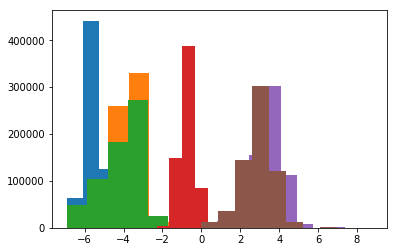

In [18]:
data_cle["log_SO2"]=numpy.log(data_cle["SO2"])
data_cle["log_NO2"]=numpy.log(data_cle["NO2"]) 
data_cle["log_O3"]=numpy.log(data_cle["O3"]) 
data_cle["log_CO"]=numpy.log(data_cle["CO"]) 
data_cle["log_PM10"]=numpy.log(data_cle["PM10"]) 
data_cle["log_PM2.5"]=numpy.log(data_cle["PM2.5"])

print(data_cle)

plt.hist(data_cle["log_SO2"])
plt.hist(data_cle["log_NO2"])
plt.hist(data_cle["log_O3"])
plt.hist(data_cle["log_CO"])
plt.hist(data_cle["log_PM10"])
plt.hist(data_cle["log_PM2.5"])

In [ ]:
data_cle = data_cle[["Measurement date","Station code",
                     "log_SO2","log_NO2","log_O3","log_CO","log_PM10","log_PM2.5",
                     "SO2_level","NO2_level","O3_level","CO_level","PM10_level","PM2.5_level"]]

outputpath='./data_cle.csv'
data_cle.to_csv(outputpath,sep=',',index=False,header=True)

In [22]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [23]:
data_mining = spark.read.csv('./data_cle.csv', header=True, inferSchema=True)

In [24]:
data_mining.show()

+----------------+------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+---------+---------+--------+--------+----------+-----------+
|Measurement date|Station code|           log_SO2|            log_NO2|             log_O3|              log_CO|          log_PM10|         log_PM2.5|SO2_level|NO2_level|O3_level|CO_level|PM10_level|PM2.5_level|
+----------------+------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+---------+---------+--------+--------+----------+-----------+
|   2017/1/1 0:00|         101|-5.521460917862246|-2.8302178350764176| -6.214608098422191|  0.1823215567939546| 4.290459441148391|  4.04305126783455|    false|    false|   false|   false|     false|      false|
|  2017/1/1 10:00|         101|-5.521460917862246| -3.101092789211817| -5.521460917862246|                 0.0| 4.330733340286331| 4.219507705176107|    fal

In [7]:
data_mining.printSchema()

root
 |-- Measurement date: string (nullable = true)
 |-- Station code: integer (nullable = true)
 |-- log_SO2: double (nullable = true)
 |-- log_NO2: double (nullable = true)
 |-- log_O3: double (nullable = true)
 |-- log_CO: double (nullable = true)
 |-- log_PM10: double (nullable = true)
 |-- log_PM2.5: double (nullable = true)
 |-- SO2_level: boolean (nullable = true)
 |-- NO2_level: boolean (nullable = true)
 |-- O3_level: boolean (nullable = true)
 |-- CO_level: boolean (nullable = true)
 |-- PM10_level: boolean (nullable = true)
 |-- PM2.5_level: boolean (nullable = true)



In [8]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [25]:
assembler = VectorAssembler(
    inputCols=["Station code","log_SO2","log_NO2","log_O3","log_CO","log_PM10"],
    outputCol="features")

In [26]:
output = assembler.transform(data_mining)

In [27]:
final_data = output.select("features","log_SO2")
final_data.show()

+--------------------+------------------+
|            features|           log_SO2|
+--------------------+------------------+
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.2983173...|-5.298317366548036|
|[101.0,-5.1159958...|-5.115995809754082|
|[101.0,-5.1159958...|-5.115995809754082|
|[101.0,-5.1159958...|-5.115995809754082|
|[101.0,-5.2983173...|-5.298317366548036|
|[101.0,-5.2983173...|-5.298317366548036|
|[101.0,-5.2983173...|-5.298317366548036|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.5214609...|-5.521460917862246|
|[101.0,-5.8091429...|-5.809142990314028|
|[101.0,-5.8091429...|-5.809142990314028|
+--------------------+------------

In [12]:
data_train, data_test = final_data.randomSplit([0.7,0.3])

In [13]:
data_train.describe().show()
data_test.describe().show()

+-------+-------------------+
|summary|            log_SO2|
+-------+-------------------+
|  count|             442233|
|   mean|-5.5141325745240914|
| stddev|0.39228756673642523|
|    min| -6.907755278982137|
|    max| 1.3180155203665962|
+-------+-------------------+

+-------+-------------------+
|summary|            log_SO2|
+-------+-------------------+
|  count|             190214|
|   mean| -5.513438869339184|
| stddev| 0.3913843177097016|
|    min| -6.907755278982137|
|    max|-0.9014021193804044|
+-------+-------------------+



In [13]:
lr = LinearRegression(labelCol='log_SO2')

In [14]:
lrModel = lr.fit(data_train)

In [15]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-6.152208575058729e-18,1.0000000000000002,8.198269512194551e-17,3.361651491200716e-17,-1.395572406544356e-17,-6.396050345178826e-17] Intercept: 2.055704010347605e-15


In [16]:
test_results = lrModel.evaluate(data_test)

In [17]:
test_results.residuals.show()
print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
|8.881784197001252...|
+--------------------+
only showing top 20 rows

RSME: 2.918651780898535e-16


In [18]:
print("R2: {}".format(test_results.r2))

R2: 1.0


In [19]:
final_data.describe().show()

+-------+-------------------+
|summary|            log_SO2|
+-------+-------------------+
|  count|             632447|
|   mean| -5.513923936606017|
| stddev|0.39201594521317135|
|    min| -6.907755278982137|
|    max| 1.3180155203665962|
+-------+-------------------+



In [20]:
unlabeled_data = data_test.select('features')
unlabeled_data.show()

+--------------------+
|            features|
+--------------------+
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
|[101.0,-6.9077552...|
+--------------------+
only showing top 20 rows



In [21]:
predictions = lrModel.transform(unlabeled_data)

In [22]:
predictions.show()
predictions.head(1)

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
|[101.0,-6.9077552...|-6.907755278982138|
+--------------------+------------

[Row(features=DenseVector([101.0, -6.9078, -4.9618, -3.912, -1.6094, 2.3979]), prediction=-6.907755278982138)]

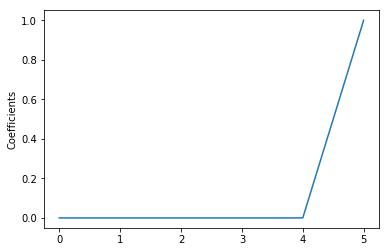

In [25]:
x = numpy.sort(lrModel.coefficients)
plt.plot(x)
plt.ylabel('Coefficients')
plt.show()

In [26]:
results_columns = lrModel.transform(unlabeled_data)
results_columns.dtypes

[('features', 'vector'), ('prediction', 'double')]

In [30]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.linalg import Vectors,Vector
from pyspark import SparkContext
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.python.pyspark.shell import spark
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import *
from pyspark.sql.functions  import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.clustering import KMeans
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree_methods_adv').getOrCreate()

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.1.1
      /_/

Using Python version 3.5.2 (default, Oct  7 2020 17:19:02)
SparkSession available as 'spark'.


In [28]:
data_mining = data_mining.withColumn("SO2_level", data_mining["SO2_level"].cast(FloatType()))
data_mining = data_mining.withColumn("NO2_level", data_mining["NO2_level"].cast(FloatType()))
data_mining = data_mining.withColumn("O3_level", data_mining["O3_level"].cast(FloatType()))
data_mining = data_mining.withColumn("CO_level", data_mining["CO_level"].cast(FloatType()))
data_mining = data_mining.withColumn("PM10_level", data_mining["PM10_level"].cast(FloatType()))

In [29]:
data_train, data_test = data_mining.randomSplit([0.7,0.3])

In [30]:
assembler = VectorAssembler(inputCols=["log_SO2","log_NO2","log_O3","log_CO","log_PM10","SO2_level","NO2_level","O3_level","CO_level","PM10_level"],outputCol="features")
output = assembler.transform(data_train)

In [34]:
label_features = output.select("features", "PM10_level").toDF('features','label')
label_features.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                            |label|
+--------------------------------------------------------------------------------------------------------------------+-----+
|(10,[0,1,2,3,4],[-5.298317366548036,-3.2441936328524905,-6.214608098422191,0.3364722366212129,4.248495242049359])   |0.0  |
|(10,[0,1,2,3,4],[-5.298317366548036,-3.101092789211817,-5.809142990314028,-0.5108256237659907,4.290459441148391])   |0.0  |
|(10,[0,1,2,4],[-5.298317366548036,-3.123565645063876,-5.521460917862246,4.394449154672439])                         |0.0  |
|(10,[0,1,2,3,4],[-5.298317366548036,-2.7181005369557116,-5.809142990314028,0.4054651081081644,4.2626798770413155])  |0.0  |
|(10,[0,1,2,3,4],[-5.298317366548036,-3.0159349808715104,-6.214608098422191,-0.10536051565782628,4.1588830833596715])|0.0  |


In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree_methods_adv').getOrCreate()

In [36]:
from pyspark.ml.feature import StringIndexer

In [38]:
indexer = StringIndexer(inputCol="PM10_level", outputCol="PM10_level_Index")
output_fixed = indexer.fit(output).transform(output)

In [39]:
final_data = output_fixed.select("features",'PM10_level_Index')

In [40]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [41]:
dtc = DecisionTreeClassifier(labelCol='PM10_level_Index',featuresCol='features')
rfc = RandomForestClassifier(labelCol='PM10_level_Index',featuresCol='features')
gbt = GBTClassifier(labelCol='PM10_level_Index',featuresCol='features')

In [43]:
dtc_model = dtc.fit(data_train)
rfc_model = rfc.fit(data_train)
gbt_model = gbt.fit(data_train)

IllegalArgumentException: 'Field "features" does not exist.'

In [16]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.linalg import Vectors,Vector
from pyspark import SparkContext
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.python.pyspark.shell import spark
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import *
from pyspark.sql.functions  import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.clustering import KMeans

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.1.1
      /_/

Using Python version 3.5.2 (default, Oct  7 2020 17:19:02)
SparkSession available as 'spark'.


In [31]:
data_mining = data_mining.withColumn("SO2_level", data_mining["SO2_level"].cast(FloatType()))
data_mining = data_mining.withColumn("NO2_level", data_mining["NO2_level"].cast(FloatType()))
data_mining = data_mining.withColumn("O3_level", data_mining["O3_level"].cast(FloatType()))
data_mining = data_mining.withColumn("CO_level", data_mining["CO_level"].cast(FloatType()))
data_mining = data_mining.withColumn("PM10_level", data_mining["PM10_level"].cast(FloatType()))

In [32]:
assembler = VectorAssembler(inputCols=["log_SO2","log_NO2","log_O3","log_CO","log_PM10","SO2_level","NO2_level","O3_level","CO_level","PM10_level"],outputCol="features")
output = assembler.transform(data_train)
label_features = output.select("features", "PM10_level").toDF('features','label')
label_features.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                            |label|
+--------------------------------------------------------------------------------------------------------------------+-----+
|(10,[0,1,2,3,4],[-5.521460917862246,-2.8302178350764176,-6.214608098422191,0.1823215567939546,4.290459441148391])   |0.0  |
|(10,[0,1,2,3,4],[-5.298317366548036,-3.101092789211817,-5.809142990314028,-0.5108256237659907,4.290459441148391])   |0.0  |
|(10,[0,1,2,3,4],[-5.298317366548036,-2.7181005369557116,-5.809142990314028,0.4054651081081644,4.2626798770413155])  |0.0  |
|(10,[0,1,2,3,4],[-5.298317366548036,-3.0159349808715104,-6.214608098422191,-0.10536051565782628,4.1588830833596715])|0.0  |
|(10,[0,1,2,3,4],[-5.115995809754082,-2.9565115604007097,-6.214608098422191,0.09531017980432493,4.330733340286331])  |0.0  |


In [33]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [34]:
model = nb.fit(label_features)

Py4JJavaError: An error occurred while calling o429.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 18.0 failed 1 times, most recent failure: Lost task 0.0 in stage 18.0 (TID 24, localhost, executor driver): java.lang.IllegalArgumentException: requirement failed: Naive Bayes requires nonnegative feature values but found (10,[0,1,2,3,4],[-5.521460917862246,-2.8302178350764176,-6.214608098422191,0.1823215567939546,4.290459441148391]).
	at scala.Predef$.require(Predef.scala:224)
	at org.apache.spark.ml.classification.NaiveBayes$.requireNonnegativeValues(NaiveBayes.scala:227)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$4.apply(NaiveBayes.scala:143)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$4.apply(NaiveBayes.scala:143)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$7.apply(NaiveBayes.scala:163)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$7.apply(NaiveBayes.scala:161)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$aggregateByKey$1$$anonfun$apply$12.apply(PairRDDFunctions.scala:177)
	at org.apache.spark.util.collection.ExternalSorter$$anonfun$5.apply(ExternalSorter.scala:189)
	at org.apache.spark.util.collection.ExternalSorter$$anonfun$5.apply(ExternalSorter.scala:188)
	at org.apache.spark.util.collection.AppendOnlyMap.changeValue(AppendOnlyMap.scala:144)
	at org.apache.spark.util.collection.SizeTrackingAppendOnlyMap.changeValue(SizeTrackingAppendOnlyMap.scala:32)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:194)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1951)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1965)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.ml.classification.NaiveBayes.trainWithLabelCheck(NaiveBayes.scala:171)
	at org.apache.spark.ml.classification.NaiveBayes.train(NaiveBayes.scala:118)
	at org.apache.spark.ml.classification.NaiveBayes.train(NaiveBayes.scala:78)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:96)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:72)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.IllegalArgumentException: requirement failed: Naive Bayes requires nonnegative feature values but found (10,[0,1,2,3,4],[-5.521460917862246,-2.8302178350764176,-6.214608098422191,0.1823215567939546,4.290459441148391]).
	at scala.Predef$.require(Predef.scala:224)
	at org.apache.spark.ml.classification.NaiveBayes$.requireNonnegativeValues(NaiveBayes.scala:227)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$4.apply(NaiveBayes.scala:143)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$4.apply(NaiveBayes.scala:143)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$7.apply(NaiveBayes.scala:163)
	at org.apache.spark.ml.classification.NaiveBayes$$anonfun$7.apply(NaiveBayes.scala:161)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$aggregateByKey$1$$anonfun$apply$12.apply(PairRDDFunctions.scala:177)
	at org.apache.spark.util.collection.ExternalSorter$$anonfun$5.apply(ExternalSorter.scala:189)
	at org.apache.spark.util.collection.ExternalSorter$$anonfun$5.apply(ExternalSorter.scala:188)
	at org.apache.spark.util.collection.AppendOnlyMap.changeValue(AppendOnlyMap.scala:144)
	at org.apache.spark.util.collection.SizeTrackingAppendOnlyMap.changeValue(SizeTrackingAppendOnlyMap.scala:32)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:194)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [36]:
df1 = spark.createDataFrame([(-1.0602,-0.282,-0.0618,0.8069,-0.9107,1.6153,-5.5214,-2.8302,-6.2146,0.1823,1)],["log_SO2","log_NO2","log_O3","log_CO","log_PM10","SO2_level","NO2_level","O3_level","CO_level","PM10_level"])
df1.show()
test_assembler = VectorAssembler(inputCols=["log_SO2","log_NO2","log_O3","log_CO","log_PM10","SO2_level","NO2_level","O3_level","CO_level","PM10_level"],outputCol="features")
test_output = test_assembler.transform(df1)
test_label_features = test_output.select("features", "PM10_level").toDF('features','label')
test_label_features.show(truncate=False)

+-------+-------+-------+------+--------+---------+---------+--------+--------+----------+---+
|log_SO2|log_NO2| log_O3|log_CO|log_PM10|SO2_level|NO2_level|O3_level|CO_level|PM10_level|_11|
+-------+-------+-------+------+--------+---------+---------+--------+--------+----------+---+
|-1.0602| -0.282|-0.0618|0.8069| -0.9107|   1.6153|  -5.5214| -2.8302| -6.2146|    0.1823|  1|
+-------+-------+-------+------+--------+---------+---------+--------+--------+----------+---+

+-----------------------------------------------------------------------------+------+
|features                                                                     |label |
+-----------------------------------------------------------------------------+------+
|[-1.0602,-0.282,-0.0618,0.8069,-0.9107,1.6153,-5.5214,-2.8302,-6.2146,0.1823]|0.1823|
+-----------------------------------------------------------------------------+------+



In [37]:
result = model.transform(test_label_features)
print(result.collect())
predictionAndLabels = result.select("prediction", "label").collect()
print(predictionAndLabels)

NameError: name 'model' is not defined